In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
df = pd.read_csv('material_merge.csv')

In [29]:
df.head()

,Unnamed: 0,Std,ID,Material,Heat treatment,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,Desc,HV,Use
0,0,ANSI,D8894772B88F495093C43AF905AB6373,Steel SAE 1015,as-rolled,421,314,39.0,126.0,207000,79000,0.3,7860,NaN,NaN,NaN,True
1,1,ANSI,05982AC66F064F9EBC709E7A4164613A,Steel SAE 1015,normalized,424,324,37.0,121.0,207000,79000,0.3,7860,NaN,NaN,NaN,True
2,2,ANSI,356D6E63FF9A49A3AB23BF66BAC85DC3,Steel SAE 1015,annealed,386,284,37.0,111.0,207000,79000,0.3,7860,NaN,NaN,NaN,True
3,3,ANSI,1C758F8714AC4E0D9BD8D8AE1625AECD,Steel SAE 1020,as-rolled,448,331,36.0,143.0,207000,79000,0.3,7860,NaN,NaN,NaN,True
4,4,ANSI,DCE10036FC1946FC8C9108D598D116AD,Steel SAE 1020,normalized,441,346,35.8,131.0,207000,79000,0.3,7860,550.0,NaN,NaN,True


In [30]:
# Bước 2: Loại bỏ các biến chất lượng thấp
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1552 non-null   int64  
 1   Std             1552 non-null   object 
 2   ID              1552 non-null   object 
 3   Material        1552 non-null   object 
 4   Heat treatment  802 non-null    object 
 5   Su              1552 non-null   int64  
 6   Sy              1552 non-null   object 
 7   A5              1346 non-null   float64
 8   E               1552 non-null   int64  
 9   G               1552 non-null   int64  
 10  mu              1552 non-null   float64
 11  Ro              1552 non-null   int64  
 12  Desc            981 non-null    object 
 13  Use             1552 non-null   bool   
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 159.3+ KB


In [32]:
df.isnull().sum()

Unnamed: 0          0
Std                 0
ID                  0
Material            0
Heat treatment    750
Su                  0
Sy                  0
A5                206
E                   0
G                   0
mu                  0
Ro                  0
Desc              571
Use                 0
dtype: int64

In [33]:
df = df.drop(['Unnamed: 0','ID','Material','Desc','Heat treatment'],axis=1)

In [34]:
# Số lượng mẫu trùng lặp
num_duplicates = df.duplicated().sum()
print(f"Số lượng mẫu trùng lặp: {num_duplicates}")
# Xoa cac mau trung lap
df = df.drop_duplicates()

Số lượng mẫu trùng lặp: 156


In [35]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

In [36]:
df['A5'].fillna(df["A5"].median(),inplace=True)

C:\Users\gvu03\AppData\Local\Temp\ipykernel_13728\3348592548.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['A5'].fillna(df["A5"].median(),inplace=True)


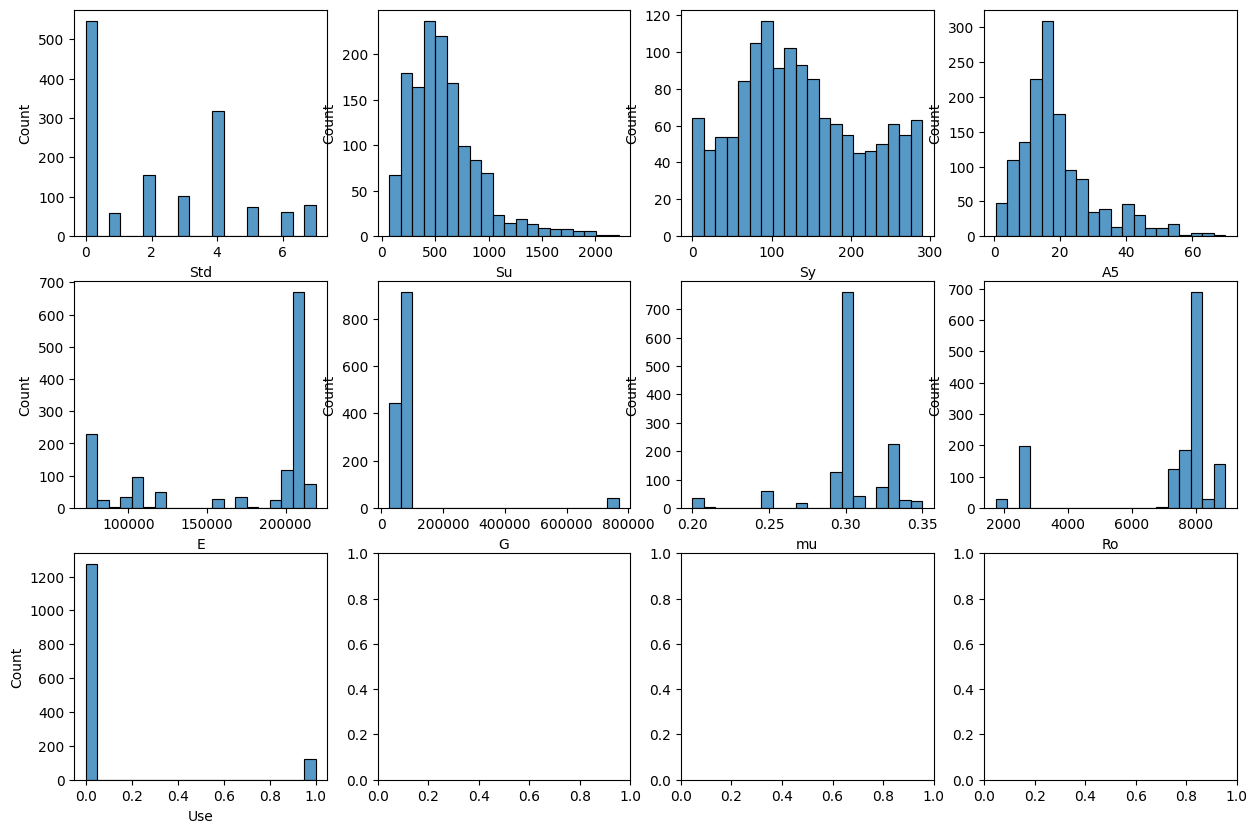

In [37]:
fig, ax = plt.subplots(3, 4, figsize=(15, 10))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//4][i%4],bins=20)

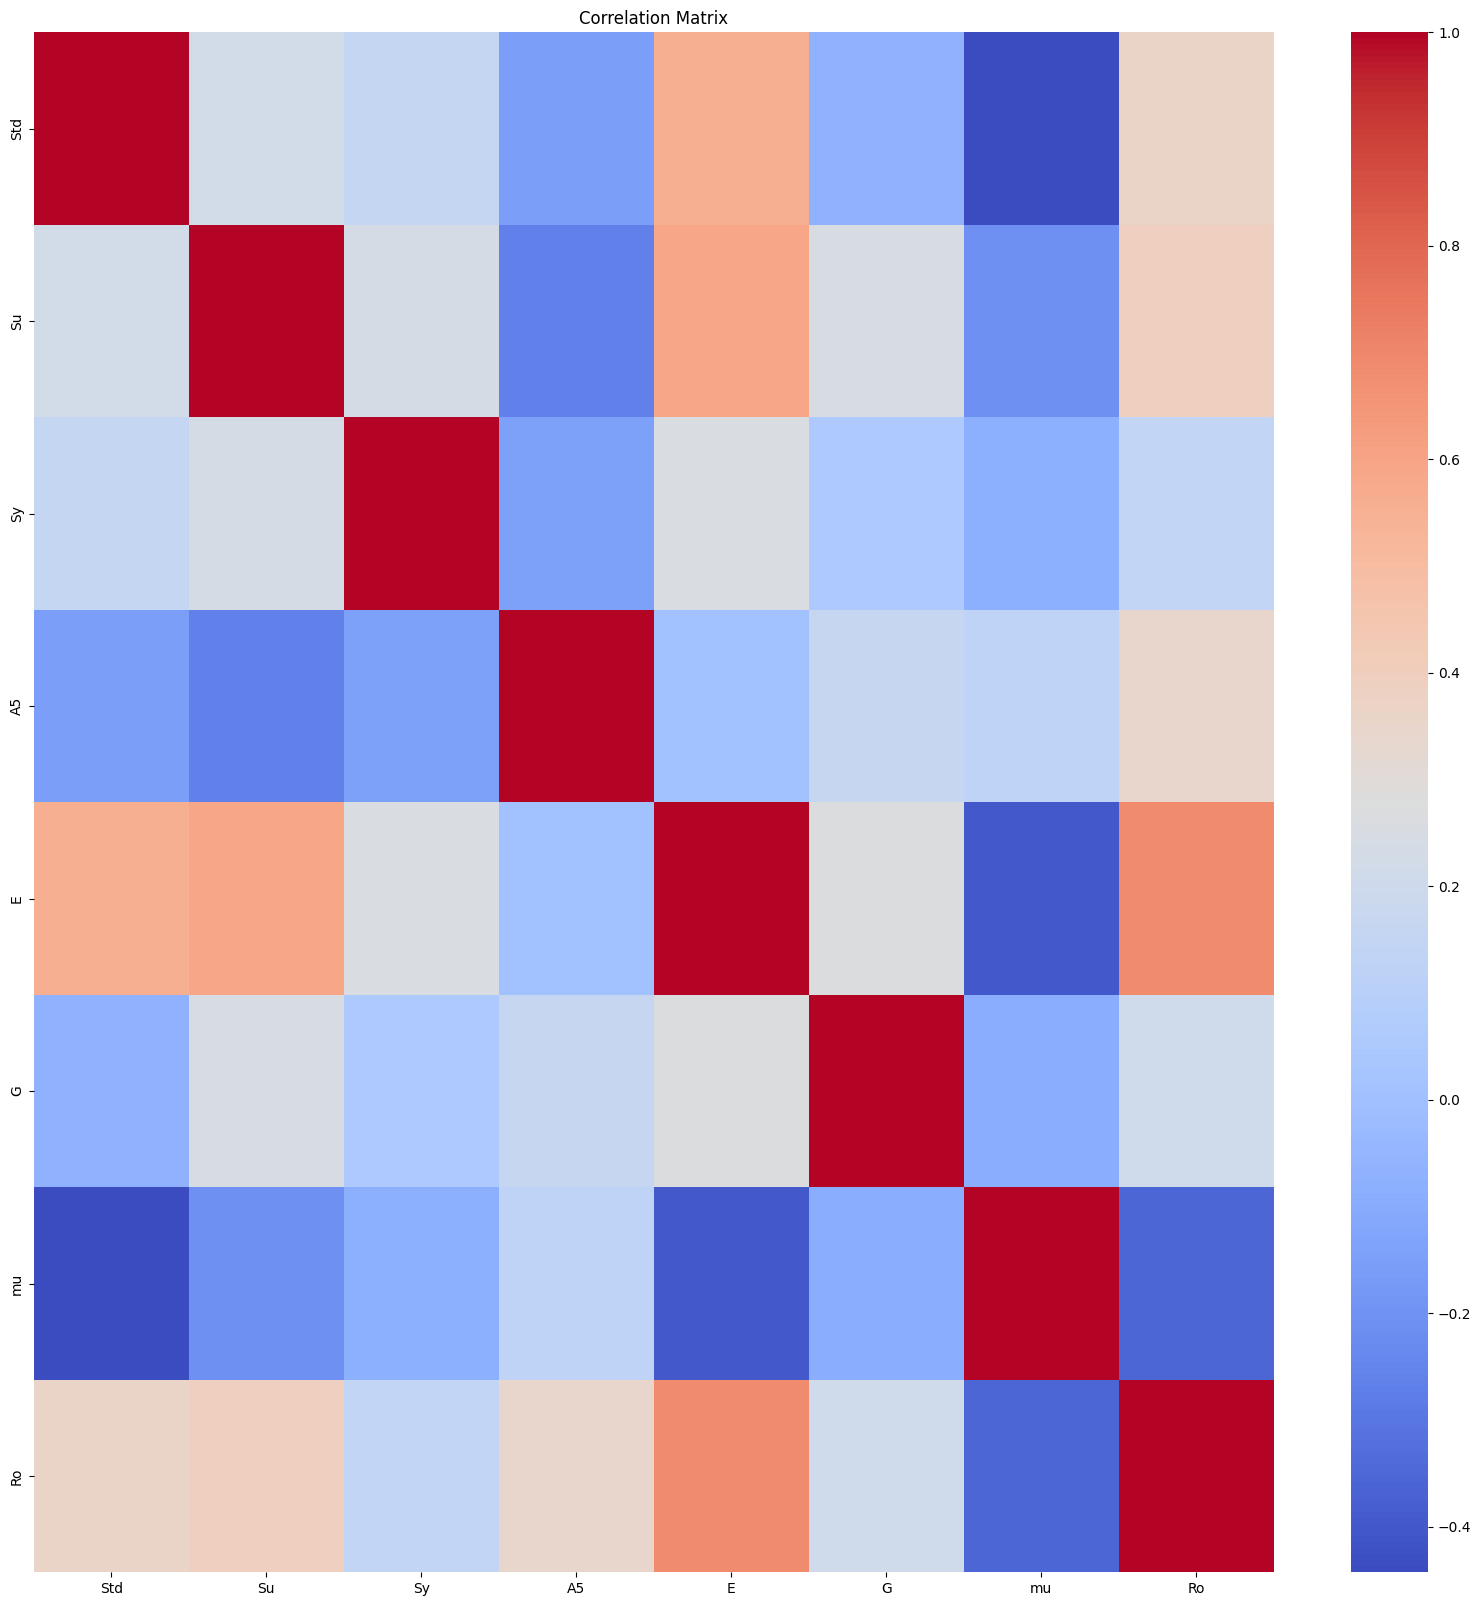

In [38]:
numeric_df = df.drop('Use', axis=1)

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()